In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import os

In [3]:
os.listdir("/clusterfs/ml4hep/mfong/transfer_learning/")

['delphes_test.h5', 'delphes_train.h5']

In [4]:
f = h5py.File('/clusterfs/ml4hep/mfong/transfer_learning/delphes_train.h5', 'r')
f_full = h5py.File("/global/ml4hep/spss/mfong/transfer_learning/train.h5", 'r')

In [7]:
# try ignoring E, use just eta phi pt
num_samples = 4000068
for k in f.keys():
    print(k, f[k].shape, f_full[k].shape)

fjet_clus_E (4000068, 200) (42233012, 200)
fjet_clus_eta (4000068, 200) (42233012, 200)
fjet_clus_phi (4000068, 200) (42233012, 200)
fjet_clus_pt (4000068, 200) (42233012, 200)
fjet_eta (4000068,) (42233012,)
fjet_m (4000068,) (42233012,)
fjet_phi (4000068,) (42233012,)
fjet_pt (4000068,) (42233012,)
labels (4000068,) (42233012,)


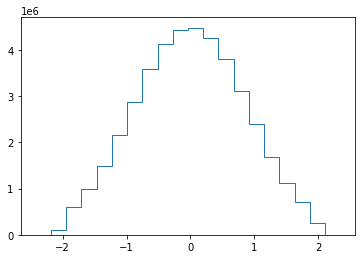

In [26]:
plt.hist(f_full[k][:4000000], bins=20, alpha=1, label="Fast sim", histtype="step");

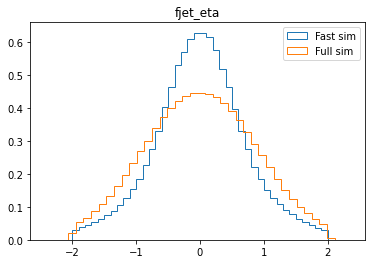

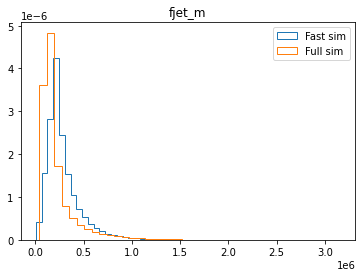

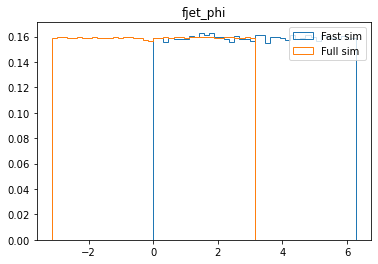

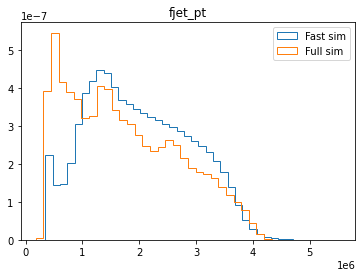

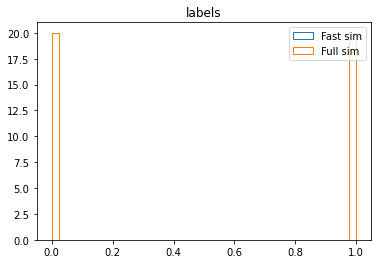

In [31]:
for k in list(f.keys())[4:]:
    plt.hist(f[k][:], bins=40, alpha=1, label="Fast sim", histtype="step", density=True);
    plt.hist(f_full[k][:], bins=40, alpha=1, label="Full sim", histtype="step", density=True);
    plt.title(k)
    plt.legend()
    plt.savefig("output/" + k + ".png")
    plt.show()

In [44]:
f["labels"][:].mean()

0.5000012499787504